# Heineken - Data Science Use Case 2024
## 👤: Paulo Cezar Cabral Junior

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFECV

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 🔍 Data exploration

First Look

In [60]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,Job ID,Date/Time,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,...,pH,Extract,Color,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,Product
0,0,2449959642,10/22/2020 2:50,64.499934,16051.99658,3999.860052,67.312984,6546.750,105.408559,6482.25,...,7.296127,15.309445,14.156956,3126.100,729.925,14.494583,908.375,6.1275,6.0200,AMST
1,1,2449959689,10/22/2020 5:44,64.500000,16067.85283,4004.256635,66.933041,6889.675,105.303989,6654.25,...,7.219022,15.285057,14.270939,3135.775,733.150,14.494583,908.375,6.1275,6.0200,AMST
2,2,2449959720,10/22/2020 7:00,64.177513,16062.20908,3996.957605,67.177043,6614.475,105.237753,7363.75,...,7.182910,14.155171,13.269140,3492.675,912.675,14.494583,908.375,6.1275,6.0200,AMST
3,3,2449960768,10/25/2020 17:38,21.392395,23908.36533,0.000000,67.916019,6718.750,105.202896,8825.75,...,NaN,14.855308,14.353551,3935.575,883.650,14.494583,908.375,6.1275,6.5575,HNK
4,4,2449960799,10/25/2020 19:33,21.177513,24607.28750,0.000000,67.037616,6357.550,105.237753,8213.00,...,NaN,15.270026,13.847422,3717.350,824.525,14.494583,908.375,6.5575,6.1275,HNK


Checking brands quantity

In [61]:
df['Product'].value_counts()

Product
AMST    180
HNK      20
Name: count, dtype: int64

Just rearranging the columns

In [62]:
df = df.loc[:,
    np.concatenate(
        (
            df.columns.difference(['Color']),
            ['Color']
        ),
        axis=None
    )
]

df.head()

,1st malt amount (kg),1st malt color,2nd malt amount (kg),2nd malt color,Date/Time,Extract,Job ID,MT - Temperature,MT - Time,Product,...,Total cold wort,Unnamed: 0,WHP Rest - Time,WHP Transfer - Time,WK - Steam,WK - Temperature,WK - Time,WOC - Time,pH,Color
0,16051.99658,6.1275,3999.860052,6.0200,10/22/2020 2:50,15.309445,2449959642,67.312984,6546.750,AMST,...,958.900,0,14.494583,729.925,6482.25,105.408559,6365.075,3126.100,7.296127,14.156956
1,16067.85283,6.1275,4004.256635,6.0200,10/22/2020 5:44,15.285057,2449959689,66.933041,6889.675,AMST,...,963.200,1,14.494583,733.150,6654.25,105.303989,5929.700,3135.775,7.219022,14.270939
2,16062.20908,6.1275,3996.957605,6.0200,10/22/2020 7:00,14.155171,2449959720,67.177043,6614.475,AMST,...,1088.975,2,14.494583,912.675,7363.75,105.237753,6366.150,3492.675,7.182910,13.269140
3,23908.36533,6.1275,0.000000,6.5575,10/25/2020 17:38,14.855308,2449960768,67.916019,6718.750,HNK,...,1127.675,3,14.494583,883.650,8825.75,105.202896,6710.150,3935.575,NaN,14.353551
4,24607.28750,6.5575,0.000000,6.1275,10/25/2020 19:33,15.270026,2449960799,67.037616,6357.550,HNK,...,1122.300,4,14.494583,824.525,8213.00,105.237753,6397.325,3717.350,NaN,13.847422


## 🧹 Data cleanning

Removing unnecessary columns

In [63]:
df.drop(
    columns=[
        'Unnamed: 0', # It's a copy of index
        'Job ID',     # It's only a batch ID
        'Date/Time'   # It's only the date time of the process's finish
    ],
    axis=1,
    inplace=True
)

df.head()

,1st malt amount (kg),1st malt color,2nd malt amount (kg),2nd malt color,Extract,MT - Temperature,MT - Time,Product,Roast amount (kg),Roast color,Total cold wort,WHP Rest - Time,WHP Transfer - Time,WK - Steam,WK - Temperature,WK - Time,WOC - Time,pH,Color
0,16051.99658,6.1275,3999.860052,6.0200,15.309445,67.312984,6546.750,AMST,64.499934,908.375,958.900,14.494583,729.925,6482.25,105.408559,6365.075,3126.100,7.296127,14.156956
1,16067.85283,6.1275,4004.256635,6.0200,15.285057,66.933041,6889.675,AMST,64.500000,908.375,963.200,14.494583,733.150,6654.25,105.303989,5929.700,3135.775,7.219022,14.270939
2,16062.20908,6.1275,3996.957605,6.0200,14.155171,67.177043,6614.475,AMST,64.177513,908.375,1088.975,14.494583,912.675,7363.75,105.237753,6366.150,3492.675,7.182910,13.269140
3,23908.36533,6.1275,0.000000,6.5575,14.855308,67.916019,6718.750,HNK,21.392395,908.375,1127.675,14.494583,883.650,8825.75,105.202896,6710.150,3935.575,NaN,14.353551
4,24607.28750,6.5575,0.000000,6.1275,15.270026,67.037616,6357.550,HNK,21.177513,908.375,1122.300,14.494583,824.525,8213.00,105.237753,6397.325,3717.350,NaN,13.847422


### • Fixing missing data

checking if the data is clean

In [64]:
df.isna().sum()

1st malt amount (kg)     0
1st malt color           0
2nd malt amount (kg)     0
2nd malt color           0
Extract                  0
MT - Temperature         0
MT - Time                0
Product                  0
Roast amount (kg)        3
Roast color              0
Total cold wort          0
WHP Rest - Time          0
WHP Transfer - Time      0
WK - Steam               0
WK - Temperature         0
WK - Time                0
WOC - Time               0
pH                      11
Color                   30
dtype: int64

Checking brands on empty Colors

In [65]:
df[df['Color'].isna()]['Product'].value_counts()

Product
AMST    30
Name: count, dtype: int64

I decided to remove the Product column because the entire manufacturing is the same for both brands

In [66]:
df.drop(
    'Product',
    axis=1,
    inplace=True
)

clearing empty data and save empty colors to predict later

In [67]:
df.dropna(
    subset=[
        'Roast amount (kg)',
        'pH'
    ],
    inplace=True
)

df_to_predict_later = df[df['Color'].isna()].copy()
df.dropna(subset=['Color'], inplace=True)

In [68]:
df_to_predict_later.head()

,1st malt amount (kg),1st malt color,2nd malt amount (kg),2nd malt color,Extract,MT - Temperature,MT - Time,Roast amount (kg),Roast color,Total cold wort,WHP Rest - Time,WHP Transfer - Time,WK - Steam,WK - Temperature,WK - Time,WOC - Time,pH,Color
38,13994.39304,6.1275,6072.513855,6.02,15.134790,77.303098,6717.675,23.327513,908.375,958.900,14.494583,732.075,6869.25,105.098326,7091.775,3159.425,5.565181,NaN
39,14021.05283,6.1275,6075.093750,6.02,15.413623,67.072473,6996.100,27.627579,908.375,954.600,14.494583,729.925,6460.75,105.168039,6411.300,3116.425,5.647166,NaN
40,13992.20000,6.1275,6074.330542,6.02,15.787452,67.107329,7225.075,23.327579,908.375,959.975,14.494583,731.000,6675.75,105.237753,6717.675,3129.325,5.652046,NaN
41,14014.87158,6.1275,6076.383960,6.02,15.677505,66.933041,6561.800,64.392526,908.375,964.275,14.494583,729.925,6428.50,105.303989,6543.525,3139.000,5.675958,NaN
42,14001.43408,6.1275,6076.921460,6.02,15.653609,66.901670,6669.300,24.509987,908.375,963.200,14.494583,735.300,6557.50,105.338846,6579.000,3141.150,5.671078,NaN


checking again if the data is clean

In [69]:
df.isna().sum()

1st malt amount (kg)    0
1st malt color          0
2nd malt amount (kg)    0
2nd malt color          0
Extract                 0
MT - Temperature        0
MT - Time               0
Roast amount (kg)       0
Roast color             0
Total cold wort         0
WHP Rest - Time         0
WHP Transfer - Time     0
WK - Steam              0
WK - Temperature        0
WK - Time               0
WOC - Time              0
pH                      0
Color                   0
dtype: int64

In [70]:
df_to_predict_later.isna().sum()

1st malt amount (kg)     0
1st malt color           0
2nd malt amount (kg)     0
2nd malt color           0
Extract                  0
MT - Temperature         0
MT - Time                0
Roast amount (kg)        0
Roast color              0
Total cold wort          0
WHP Rest - Time          0
WHP Transfer - Time      0
WK - Steam               0
WK - Temperature         0
WK - Time                0
WOC - Time               0
pH                       0
Color                   30
dtype: int64

### • Outliers removal

Checking the histogram of the target column

<Axes: xlabel='Color', ylabel='Count'>

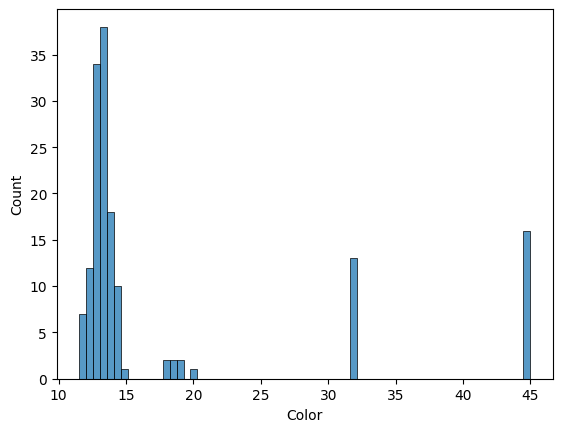

In [71]:
sns.histplot(df['Color'])

removing outliers found

<Axes: xlabel='Color', ylabel='Count'>

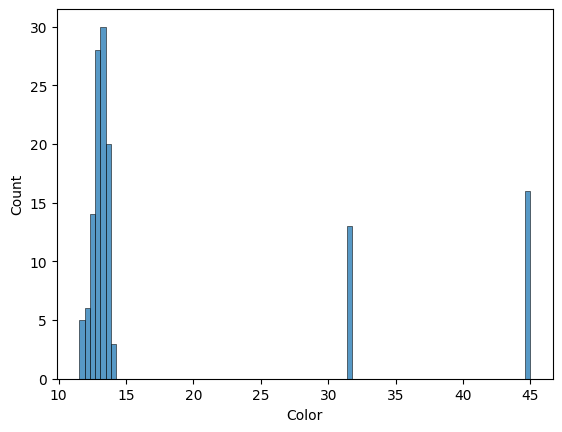

In [72]:
df = df.drop(df[
    (df['Color'] > 14) &
     (df['Color'] < 25)
].index)

sns.histplot(df['Color'])

checking scatter plots from RFECV columns

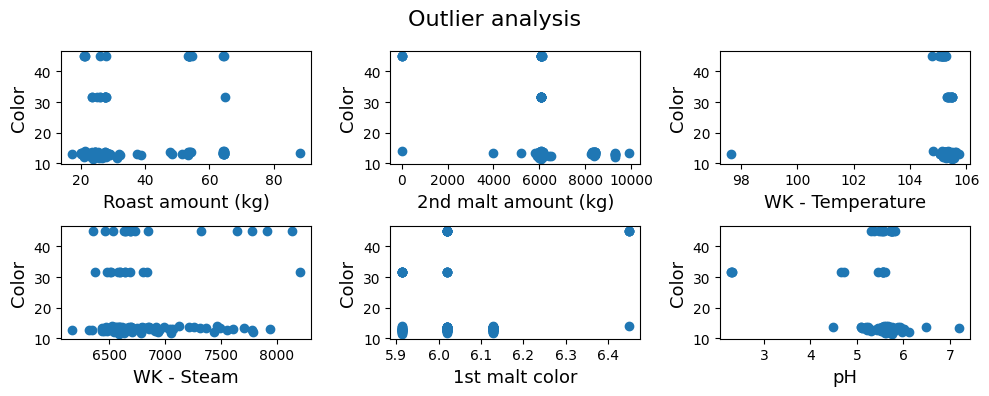

In [73]:
fig, axs = plt.subplots(2, 3, figsize=(10, 4))

colunas = ['Roast amount (kg)', '2nd malt amount (kg)', 'WK - Temperature',
       'WK - Steam', '1st malt color', 'pH', 'Color']

for i, ax in enumerate(axs.flatten()):
    ax.scatter(
        x=df[colunas[i]],
        y=df['Color']
    )
    ax.set_ylabel('Color', fontsize=13)
    ax.set_xlabel(colunas[i], fontsize=13)

fig.suptitle('Outlier analysis', fontsize=16)

plt.tight_layout()
plt.show()

removing outliers found

In [74]:
df = df.drop(df[
    df['WK - Temperature'] < 98
].index)

df = df.drop(df[
    df['pH'] < 3
].index)

### ⚙️ Feature Engineering

Identifying highly correlated columns

<Axes: >

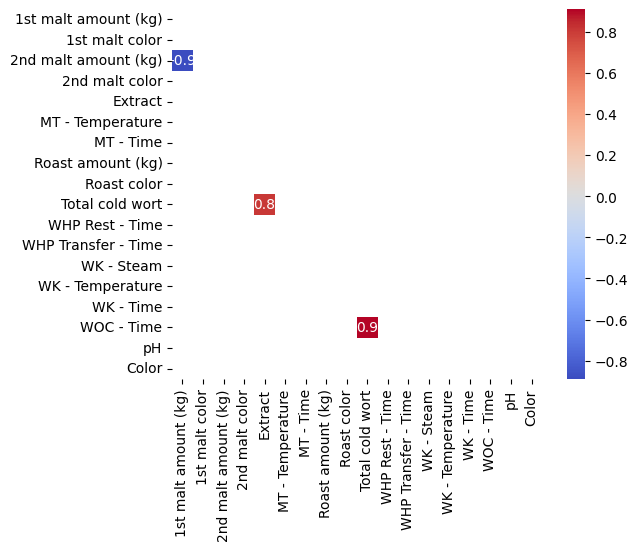

In [75]:
matriz_correlacao = df.corr()

mask = np.zeros_like(matriz_correlacao, dtype=bool)
mask[np.triu_indices_from(mask)] = True

matriz_correlacao[abs(matriz_correlacao) < 0.8] = np.nan

sns.heatmap(
    matriz_correlacao,
    annot=True,
    mask=mask,
    fmt='.1f',
    cmap='coolwarm',
    square=True
)

Removing one of the highly correlated columns

In [76]:
df.drop(
    [
        '1st malt amount (kg)',
        'Extract',
        'WOC - Time'
    ],
    axis=1,
    inplace=True
)

## 🦾 Trainnig the model

#### • Model building

In [77]:
X = df.drop('Color', axis=1)
y = df['Color']

print(f'Total lines for training: {X.shape[0]}')

Total lines for training: 130


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
modelo = RandomForestRegressor(n_estimators=100, random_state=42)

I'm using RFECV to know the columns who had the most importance to the training and use these at the beginning of this code

In [80]:
rfecv = RFECV(
    estimator=modelo,
    cv=4,
    step=1,
    scoring='neg_mean_squared_error'
)

rfecv.fit(X_train, y_train)

X_train_rfe = rfecv.transform(X_train)
X_test_rfe = rfecv.transform(X_test)

print(f'Quantidade de features selecionadas: {rfecv.n_features_}')
print('Colunas selecionadas:')
[col for col, is_selected in zip(X.columns, rfecv.support_) if is_selected]

Quantidade de features selecionadas: 5
Colunas selecionadas:


['1st malt color',
 '2nd malt amount (kg)',
 'Roast amount (kg)',
 'WK - Temperature',
 'pH']

In [81]:
modelo.fit(X_train_rfe, y_train)
previsoes = modelo.predict(X_test_rfe)

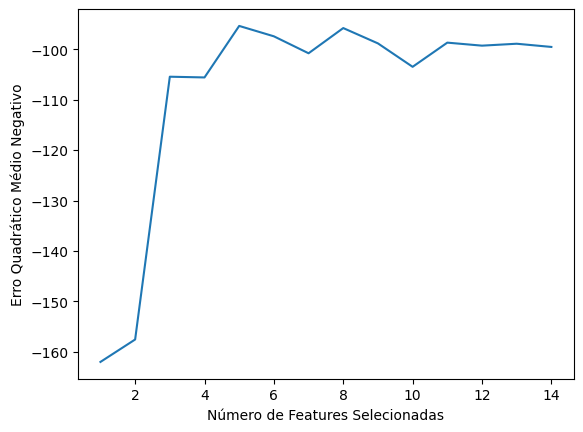

In [82]:
plt.figure()
plt.xlabel("Número de Features Selecionadas")
plt.ylabel("Erro Quadrático Médio Negativo")
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    rfecv.cv_results_['mean_test_score']
)
plt.show()

#### • Model performance

In [83]:
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f"Mean squared error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean squared error: 35.30
R2 Score: 0.70


## 🔮 Predicting empyt Colors

recleaning

In [84]:
df_to_predict_later_final = df_to_predict_later.copy()

df_to_predict_later = df_to_predict_later[X.columns[rfecv.support_]]

df_to_predict_later.head()

,1st malt color,2nd malt amount (kg),Roast amount (kg),WK - Temperature,pH
38,6.1275,6072.513855,23.327513,105.098326,5.565181
39,6.1275,6075.093750,27.627579,105.168039,5.647166
40,6.1275,6074.330542,23.327579,105.237753,5.652046
41,6.1275,6076.383960,64.392526,105.303989,5.675958
42,6.1275,6076.921460,24.509987,105.338846,5.671078


predicting and saving index

In [85]:
previsoes_vazios = modelo.predict(df_to_predict_later.values)

returning original values

In [86]:
df_to_predict_later_final['Color'] = previsoes_vazios

Here's the predictions for the empty color data

In [87]:
df_to_predict_later_final

,1st malt amount (kg),1st malt color,2nd malt amount (kg),2nd malt color,Extract,MT - Temperature,MT - Time,Roast amount (kg),Roast color,Total cold wort,WHP Rest - Time,WHP Transfer - Time,WK - Steam,WK - Temperature,WK - Time,WOC - Time,pH,Color
38,13994.39304,6.1275,6072.513855,6.02,15.134790,77.303098,6717.675,23.327513,908.375,958.900,14.494583,732.075,6869.25,105.098326,7091.775,3159.425,5.565181,24.573797
39,14021.05283,6.1275,6075.093750,6.02,15.413623,67.072473,6996.100,27.627579,908.375,954.600,14.494583,729.925,6460.75,105.168039,6411.300,3116.425,5.647166,12.666402
40,13992.20000,6.1275,6074.330542,6.02,15.787452,67.107329,7225.075,23.327579,908.375,959.975,14.494583,731.000,6675.75,105.237753,6717.675,3129.325,5.652046,13.115606
41,14014.87158,6.1275,6076.383960,6.02,15.677505,66.933041,6561.800,64.392526,908.375,964.275,14.494583,729.925,6428.50,105.303989,6543.525,3139.000,5.675958,14.343726
42,14001.43408,6.1275,6076.921460,6.02,15.653609,66.901670,6669.300,24.509987,908.375,963.200,14.494583,735.300,6557.50,105.338846,6579.000,3141.150,5.671078,13.419435
43,13981.76179,6.1275,6070.525000,6.02,15.453057,66.866813,6776.800,64.392461,908.375,968.575,14.512500,733.150,6482.25,105.338846,6519.875,3146.525,5.675958,13.807873
44,14006.21804,6.1275,6075.577710,6.02,15.619666,67.037616,6645.650,64.392461,908.375,962.125,14.494583,734.225,6525.25,105.408559,6481.175,3175.550,5.938992,16.468508
45,14032.72771,6.1275,6070.740210,6.02,15.536345,66.901670,6684.350,64.284987,908.375,961.050,14.512500,736.375,6837.00,105.443416,7081.025,3499.125,5.593973,14.125866
46,14061.63408,6.1275,6068.375000,6.02,15.579120,67.243271,6689.725,25.800000,908.375,968.575,14.494583,743.900,6374.75,105.443416,6366.150,3162.650,5.719391,12.826705
47,14103.77429,6.1275,6073.094397,6.02,15.688546,66.933041,6605.875,26.659987,908.375,963.200,14.494583,733.150,6557.50,105.443416,6524.175,3141.150,5.729151,12.948547
